Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Practicum, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

## Objetivo

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.



### Descripción de los datos

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Estimado/a estudiante,
Tu proyecto sobre la identificación de operadores ineficaces para CallMeMaybe muestra un análisis detallado y bien estructurado. Aquí están mis observaciones:
Puntos fuertes:

Excelente preparación y limpieza de datos, incluyendo el manejo de duplicados y valores nulos.
Buen uso de visualizaciones para explorar la distribución de los datos.
Análisis detallado de los tres criterios de ineficacia: llamadas perdidas, tiempo de espera y llamadas salientes.
Uso apropiado de pruebas estadísticas para comparar las diferentes métricas.
Conclusiones claras y recomendaciones basadas en el análisis.

Áreas de mejora:

Considera profundizar en el análisis de las causas subyacentes de la ineficacia de los operadores.
Podrías explorar la relación entre las diferentes métricas de ineficacia utilizando análisis de correlación.
Sería interesante ver un análisis de cómo la ineficacia varía según la tarifa del cliente o la fecha de registro.

El dashboard en Tableau y la presentación son excelentes complementos a tu análisis. Proporcionan una visualización clara de tus hallazgos y facilitarán la comunicación de tus resultados a los stakeholders.
En general, has realizado un trabajo sólido que proporciona insights valiosos para CallMeMaybe. Tus recomendaciones sobre reentrenamiento o posible reemplazo de operadores ineficaces están bien fundamentadas en los datos.
Sigue adelante con tu excelente trabajo analítico.
</div>

## Lleva a cabo el análisis exploratorio de datos

Haz una lista de 5 a 10 fuentes (documentación, artículos, etc) que usaste mientras trabajabas en el proyecto. Brinda explicaciones breves sobre las preguntas que cada fuente te ayudó a responder. Prepara una presentación con tus conclusiones. Puedes usar cualquier herramienta que quieras para hacer la presentación, pero debes enviarla en PDF. Coloca el enlace en el cuerpo del proyecto principal.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Me parece genial que hayas incluido una tabla de contenidos en tu documento, esto facilitará la navegación y comprensión de los temas que estás tratando. ¡Sigue así!</div>
</div>


In [1]:
#importcion librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import scipy.integrate

In [2]:
clients = pd.read_csv('/datasets/telecom_clients_us.csv')
clients.info()
print(clients)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
     user_id tariff_plan  date_start
0     166713           A  2019-08-15
1     166901           A  2019-08-23
2     168527           A  2019-10-29
3     167097           A  2019-09-01
4     168193           A  2019-10-16
..       ...         ...         ...
727   166554           B  2019-08-08
728   166911           B  2019-08-23
729   167012           B  2019-08-28
730   166867           B  2019-08-22
731   166565           B  2019-08-08

[732 rows x 3 columns]


In [3]:
dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')
dataset.info()
dataset.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
16121,166916,2019-09-27 00:00:00+03:00,out,False,906396.0,False,2,183,206
51724,168336,2019-11-19 00:00:00+03:00,in,False,958416.0,False,1,7,21
424,166377,2019-10-29 00:00:00+03:00,out,False,880028.0,False,33,2036,2388
8080,166658,2019-08-28 00:00:00+03:00,in,False,890406.0,False,5,2890,2931
41813,167888,2019-11-19 00:00:00+03:00,out,False,928886.0,True,1,0,48
6782,166582,2019-09-06 00:00:00+03:00,in,False,885890.0,True,2,0,26
45379,168062,2019-11-22 00:00:00+03:00,out,True,952392.0,True,1,0,10
7229,166582,2019-10-23 00:00:00+03:00,out,False,925922.0,False,1,900,915
43683,168018,2019-10-24 00:00:00+03:00,out,False,945894.0,False,5,89,163
27064,167172,2019-10-29 00:00:00+03:00,out,False,929228.0,False,1,38,47


In [4]:
#revisión de datos duplicados
print("El número de datos duplicados en dataset es ", dataset.duplicated().sum())
dataset.drop_duplicates(inplace=True)
dataset.info(memory_usage = 'deep')

El número de datos duplicados en dataset es  4900
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              49002 non-null  int64  
 1   date                 49002 non-null  object 
 2   direction            49002 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          41546 non-null  float64
 5   is_missed_call       49002 non-null  bool   
 6   calls_count          49002 non-null  int64  
 7   call_duration        49002 non-null  int64  
 8   total_call_duration  49002 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 10.4 MB


In [5]:
#revisión de datos duplicados
print("El número de datos duplicados en clients es ", clients.duplicated().sum())
clients.drop_duplicates(inplace=True)
clients.info(memory_usage = 'deep')

El número de datos duplicados en clients es  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 100.8 KB


In [6]:
# revisión de datos vacíos
print("El número de datos ausentes en dataset: ", dataset.isna().sum())
dataset = dataset.dropna()
print("El número de datos ausentes en dataset: ", dataset.isna().sum())
dataset.info(memory_usage = 'deep')

El número de datos ausentes en dataset:  user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64
El número de datos ausentes en dataset:  user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              41491 non-null  int64  
 1   date                 41491 non-null  object 
 2   direction            41491 non-null  object 
 3   internal             41491 non-null  object 
 4   op

In [7]:
# conversión string a datetime
dataset['date']= pd.to_datetime(dataset['date'], format='%Y-%m-%dT%H:%M:%S')
dataset['dt_gmt'] = dataset['date'].dt.tz_convert('GMT')

# obtener solo fecha
dataset['date_dt'] = dataset['dt_gmt'].dt.date

dataset.info()
dataset.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 53899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              41491 non-null  int64                                
 1   date                 41491 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            41491 non-null  object                               
 3   internal             41491 non-null  object                               
 4   operator_id          41491 non-null  float64                              
 5   is_missed_call       41491 non-null  bool                                 
 6   calls_count          41491 non-null  int64                                
 7   call_duration        41491 non-null  int64                                
 8   total_call_duration  41491 non-null  int64                                
 9   dt_gmt

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,dt_gmt,date_dt
24408,167109,2019-11-22 00:00:00+03:00,in,False,907182.0,False,2,1859,1871,2019-11-21 21:00:00+00:00,2019-11-21
22329,167059,2019-11-13 00:00:00+03:00,in,False,911140.0,False,1,105,127,2019-11-12 21:00:00+00:00,2019-11-12
52717,168361,2019-11-17 00:00:00+03:00,out,False,945304.0,True,59,0,587,2019-11-16 21:00:00+00:00,2019-11-16
52968,168361,2019-11-24 00:00:00+03:00,out,False,945294.0,True,34,0,548,2019-11-23 21:00:00+00:00,2019-11-23
16585,166916,2019-10-23 00:00:00+03:00,out,True,906408.0,False,1,92,94,2019-10-22 21:00:00+00:00,2019-10-22
37597,167630,2019-10-01 00:00:00+03:00,out,False,920666.0,True,4,0,55,2019-09-30 21:00:00+00:00,2019-09-30
17052,166916,2019-11-15 00:00:00+03:00,out,True,906412.0,True,2,0,46,2019-11-14 21:00:00+00:00,2019-11-14
29023,167199,2019-10-02 00:00:00+03:00,out,False,911310.0,False,1,15,29,2019-10-01 21:00:00+00:00,2019-10-01
22962,167071,2019-11-21 00:00:00+03:00,in,False,913938.0,False,85,6508,7108,2019-11-20 21:00:00+00:00,2019-11-20
45267,168062,2019-11-21 00:00:00+03:00,out,True,947614.0,False,1,8,12,2019-11-20 21:00:00+00:00,2019-11-20


In [8]:
#conversion de operator_id a int
dataset['operator_id'] = dataset['operator_id'].astype(int)

dataset.info()
dataset.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 53899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              41491 non-null  int64                                
 1   date                 41491 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            41491 non-null  object                               
 3   internal             41491 non-null  object                               
 4   operator_id          41491 non-null  int64                                
 5   is_missed_call       41491 non-null  bool                                 
 6   calls_count          41491 non-null  int64                                
 7   call_duration        41491 non-null  int64                                
 8   total_call_duration  41491 non-null  int64                                
 9   dt_gmt

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,dt_gmt,date_dt
32490,167466,2019-11-06 00:00:00+03:00,out,False,921818,False,36,892,1447,2019-11-05 21:00:00+00:00,2019-11-05
20034,166997,2019-09-27 00:00:00+03:00,in,False,905430,False,8,1021,1073,2019-09-26 21:00:00+00:00,2019-09-26
47095,168180,2019-11-27 00:00:00+03:00,in,False,958640,False,1,75,84,2019-11-26 21:00:00+00:00,2019-11-26
20214,166997,2019-10-24 00:00:00+03:00,out,False,903318,False,3,606,697,2019-10-23 21:00:00+00:00,2019-10-23
13962,166812,2019-11-26 00:00:00+03:00,out,False,900594,True,1,0,9,2019-11-25 21:00:00+00:00,2019-11-25
46197,168091,2019-11-19 00:00:00+03:00,out,True,958672,False,3,76,90,2019-11-18 21:00:00+00:00,2019-11-18
33359,167487,2019-11-27 00:00:00+03:00,out,False,914052,True,6,0,103,2019-11-26 21:00:00+00:00,2019-11-26
25415,167125,2019-10-11 00:00:00+03:00,out,True,902782,True,2,0,1,2019-10-10 21:00:00+00:00,2019-10-10
39893,167756,2019-11-22 00:00:00+03:00,out,False,938896,False,34,1898,2523,2019-11-21 21:00:00+00:00,2019-11-21
47698,168187,2019-10-28 00:00:00+03:00,in,False,937862,False,4,676,715,2019-10-27 21:00:00+00:00,2019-10-27


In [9]:
# conversión string a datetime
clients['date_start']= pd.to_datetime(clients['date_start'], format='%Y-%m-%d')

clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.9+ KB


## Identificar operadores ineficaces
###  Gran cantidad de llamadas entrantes perdidas (internas y externas)


In [10]:
op_miss = dataset.groupby('operator_id')['is_missed_call'].count()
op_miss = op_miss.reset_index()
op_miss = op_miss.sort_values(by='is_missed_call')
print(op_miss)

      operator_id  is_missed_call
1091       973286               1
871        946020               1
867        945898               1
864        945710               1
842        945274               1
...           ...             ...
33         887276             267
28         885876             283
108        893804             289
203        901880             300
204        901884             323

[1092 rows x 2 columns]


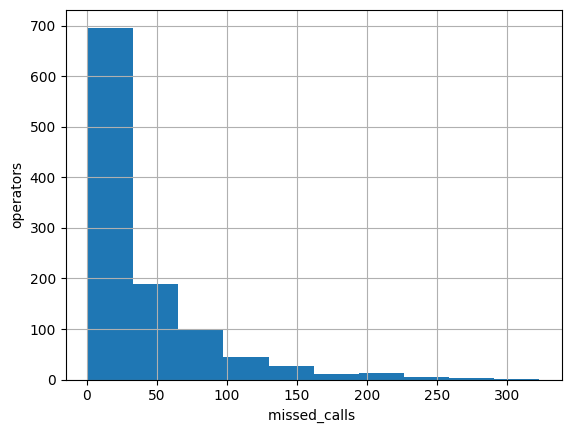

In [11]:
op_miss['is_missed_call'].hist()
plt.xlabel('missed_calls ', fontsize = 10)
plt.ylabel('operators', fontsize = 10)
plt.show()

In [12]:
op_miss['is_missed_call'].describe()

count    1092.000000
mean       37.995421
std        49.141679
min         1.000000
25%         5.000000
50%        19.000000
75%        50.000000
max       323.000000
Name: is_missed_call, dtype: float64

In [13]:
op_miss_75 = op_miss['is_missed_call'].quantile(0.75)
print('Se determina que gran cantidad de llamadas será, el operador que sobrepase el percentil 90 del conjunto de datos: ', op_miss_75)

Se determina que gran cantidad de llamadas será, el operador que sobrepase el percentil 90 del conjunto de datos:  50.0


In [14]:
op_miss[op_miss['is_missed_call']>op_miss_75].count()

operator_id       270
is_missed_call    270
dtype: int64

Existen 270 operadores que sobrepasan las 97 llamadas perdidas.

### Tiempo de espera prolongado para las llamadas entrantes

In [15]:
dataset['time_wait'] = dataset['total_call_duration'] - dataset['call_duration']
dataset.sample(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,dt_gmt,date_dt,time_wait
52924,168361,2019-11-22 00:00:00+03:00,out,False,945312,False,16,1858,2221,2019-11-21 21:00:00+00:00,2019-11-21,363
29202,167200,2019-11-13 00:00:00+03:00,in,False,905862,False,1,222,232,2019-11-12 21:00:00+00:00,2019-11-12,10
11266,166691,2019-09-16 00:00:00+03:00,out,False,889410,True,2,0,64,2019-09-15 21:00:00+00:00,2019-09-15,64
41117,167828,2019-11-19 00:00:00+03:00,in,False,938612,False,7,758,793,2019-11-18 21:00:00+00:00,2019-11-18,35
15818,166901,2019-10-16 00:00:00+03:00,out,True,896008,False,2,102,112,2019-10-15 21:00:00+00:00,2019-10-15,10
31927,167445,2019-11-18 00:00:00+03:00,in,False,943066,False,14,902,1088,2019-11-17 21:00:00+00:00,2019-11-17,186
7053,166582,2019-10-07 00:00:00+03:00,in,False,885876,True,1,0,13,2019-10-06 21:00:00+00:00,2019-10-06,13
32054,167445,2019-11-25 00:00:00+03:00,in,False,920902,False,2,277,305,2019-11-24 21:00:00+00:00,2019-11-24,28
23690,167109,2019-09-13 00:00:00+03:00,out,True,907182,False,7,262,308,2019-09-12 21:00:00+00:00,2019-09-12,46
31722,167445,2019-11-06 00:00:00+03:00,in,False,920838,False,2,68,91,2019-11-05 21:00:00+00:00,2019-11-05,23


In [16]:
op_tpro = dataset.groupby('operator_id')['time_wait'].mean()
op_tpro = op_tpro.reset_index()
op_tpro.columns = op_tpro.columns.str.replace('time_wait','mean_tw')
op_tpro.sample(5)

,operator_id,mean_tw
380,914266,22.333333
486,920874,48.052632
1010,958456,474.485714
601,930660,27.500000
315,908180,15.000000


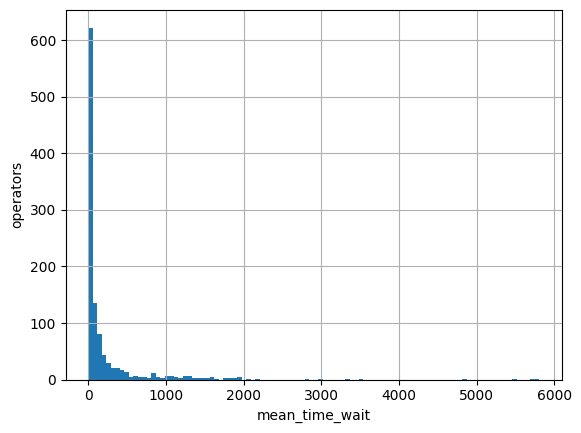

In [17]:
op_tpro['mean_tw'].hist(bins=100)
plt.xlabel('mean_time_wait', fontsize = 10)
plt.ylabel('operators', fontsize = 10)
plt.show()

In [18]:
op_tpro['mean_tw'].describe()

count    1092.000000
mean      216.249892
std       507.052815
min         0.000000
25%        23.000000
50%        46.619048
75%       159.758929
max      5805.027397
Name: mean_tw, dtype: float64

In [19]:
time_wait_75 = op_tpro['mean_tw'].quantile(0.75)
print('Se determina que tiempo prolongado de espera será el que sobrepase el percentil 75 del promedio del tiempo de espera: ', time_wait_75)

Se determina que tiempo prolongado de espera será el que sobrepase el percentil 75 del promedio del tiempo de espera:  159.75892857142856


In [20]:
op_tpr = op_tpro[op_tpro['mean_tw']>time_wait_75]
op_tpr.sample(5)

,operator_id,mean_tw
465,919554,461.650602
856,945310,1605.311111
1052,965542,1224.769231
319,908834,167.800000
429,919166,245.416667


In [21]:
op_tpr['operator_id'].nunique()

273

Existen 273 operadores que en promedio contestan 159 segundos después considerandose éste un tiempo prolongado

### Número reducido de llamadas salientes

In [22]:
calls_out = dataset[dataset['direction']=='out']
calls_out.sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,dt_gmt,date_dt,time_wait
36680,167626,2019-10-01 00:00:00+03:00,out,False,919910,True,10,0,282,2019-09-30 21:00:00+00:00,2019-09-30,282
12382,166725,2019-10-21 00:00:00+03:00,out,False,889754,False,10,719,850,2019-10-20 21:00:00+00:00,2019-10-20,131
34579,167497,2019-11-22 00:00:00+03:00,out,False,924948,False,1,45,56,2019-11-21 21:00:00+00:00,2019-11-21,11
27258,167175,2019-10-07 00:00:00+03:00,out,False,905842,False,4,839,892,2019-10-06 21:00:00+00:00,2019-10-06,53
6308,166541,2019-10-17 00:00:00+03:00,out,False,908958,True,2,0,2,2019-10-16 21:00:00+00:00,2019-10-16,2


In [23]:
op_call_out = calls_out.groupby('operator_id')['direction'].count()
op_call_out = op_call_out.reset_index()
op_call_out.sample(5)

,operator_id,direction
201,905538,191
173,902742,65
744,948182,50
113,896384,3
638,940782,4


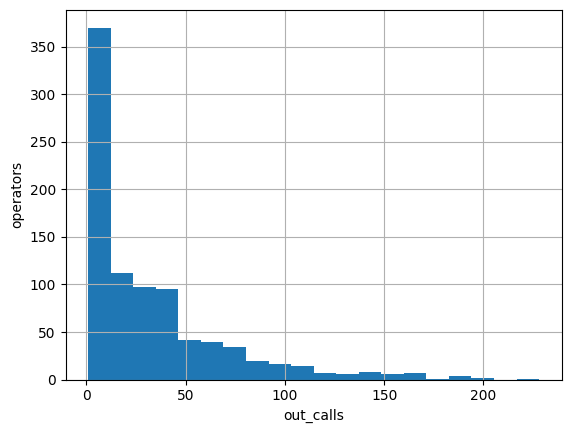

In [24]:
op_call_out['direction'].hist(bins = 20)
plt.xlabel('out_calls', fontsize = 10)
plt.ylabel('operators', fontsize = 10)
plt.show()

In [25]:
op_call_out['direction'].describe()

count    882.000000
mean      32.667800
std       38.145841
min        1.000000
25%        5.000000
50%       19.000000
75%       45.000000
max      228.000000
Name: direction, dtype: float64

In [26]:
op_call_out_25 = op_call_out['direction'].quantile(0.25)
print('Se determina que un número reducido de llamadas será menor al percentil 25: ', op_call_out_25 )

Se determina que un número reducido de llamadas será menor al percentil 25:  5.0


In [27]:
op_call_out[op_call_out['direction']<5].count()

operator_id    216
direction      216
dtype: int64

Existen 216 operadores que han realizado un número de llamadas salientes menor a 5

<div class="alert alert-block alert-success">
<b>Comentario del revisor: Identificar operadores ineficaces</b> <a class="tocSkip"></a>
Excelente trabajo en la definición y cuantificación de los criterios de ineficacia. El uso de percentiles para establecer umbrales es una buena aproximación. Las visualizaciones aquí son particularmente útiles.
</div>

## Prueba las hipótesis estadísticas

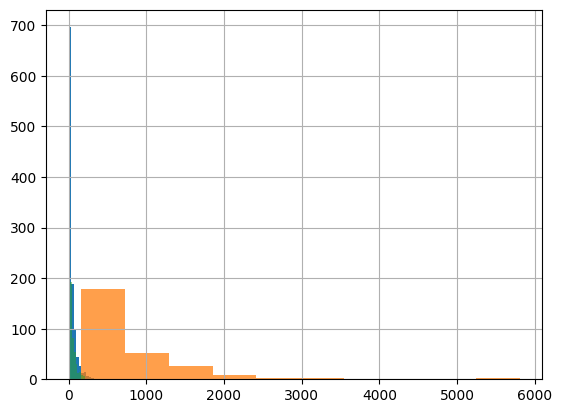

In [28]:
op_miss['is_missed_call'].hist()
op_tpr['mean_tw'].hist(alpha = 0.75)
op_call_out['direction'].hist(alpha = 0.5)
plt.show()

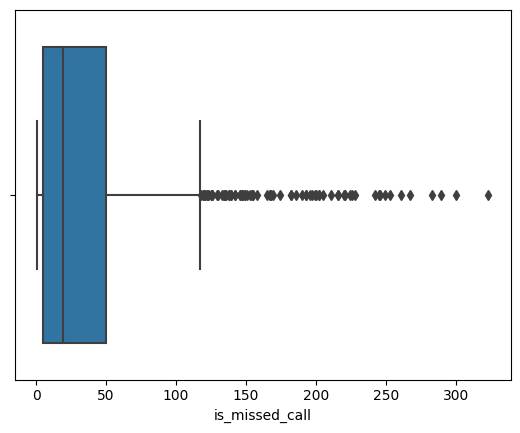

In [29]:
sns.boxplot(op_miss['is_missed_call'])
plt.show()

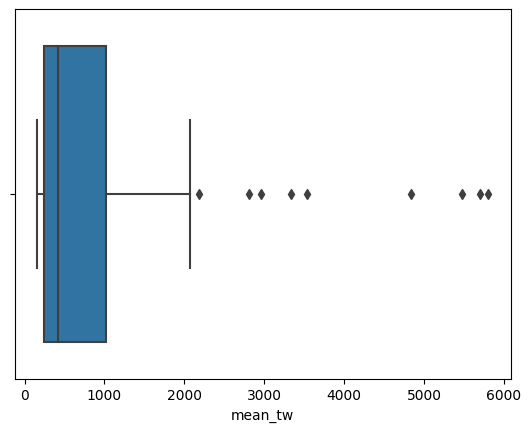

In [30]:
sns.boxplot(op_tpr['mean_tw'])
plt.show()

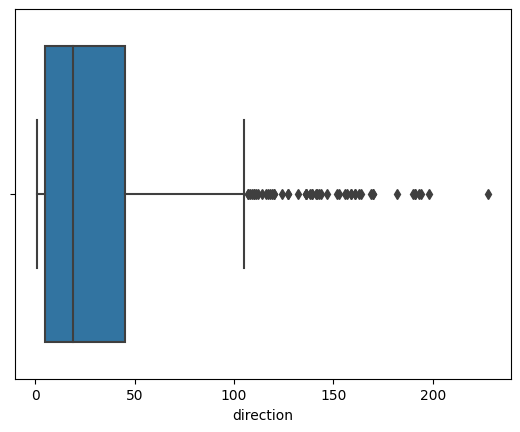

In [31]:
sns.boxplot(op_call_out['direction'])
plt.show()

### Corrección de valores atípicos

In [32]:
#CORRECCION DE VALORES ATIPICOS
missed_calls = op_miss['is_missed_call']
print ("El número de datos de missed_calls es:", len(missed_calls))
print()
# Calcular pencentiles
cuartil3 = missed_calls.quantile(0.75)
cuartil1 = missed_calls.quantile(0.25)

# Calcular IQR
iqr = cuartil3 - cuartil1

# Límites upper y lower
upper = cuartil3 + (1.5 * iqr)
lower = cuartil1 - (1.5 * iqr)

#Eliminar outliers
corr_missed_calls = missed_calls.where((missed_calls > lower) & (missed_calls < upper), None)
corr_missed_calls = corr_missed_calls.dropna()
print ("El número de datos de corr_missed_calls es:", len(corr_missed_calls))

El número de datos de missed_calls es: 1092

El número de datos de corr_missed_calls es: 1011


In [33]:
#CORRECCION DE VALORES ATIPICOS
op_tpro_tw = op_tpro['mean_tw']
print ("El número de datos de op_tpro_tw es:", len(op_tpro_tw))
print()
# Calcular pencentiles
cuartil3 = op_tpro_tw.quantile(0.75)
cuartil1 = op_tpro_tw.quantile(0.25)

# Calcular IQR
iqr = cuartil3 - cuartil1

# Límites upper y lower
upper = cuartil3 + (1.5 * iqr)
lower = cuartil1 - (1.5 * iqr)

#Eliminar outliers
corr_op_tpro_tw = op_tpro_tw.where((op_tpro_tw > lower) & (op_tpro_tw < upper), None)
corr_op_tpro_tw = corr_op_tpro_tw.dropna()
print ("El número de datos de corr_op_tpro_tw es:", len(corr_op_tpro_tw))

El número de datos de op_tpro_tw es: 1092

El número de datos de corr_op_tpro_tw es: 938


In [34]:
#CORRECCION DE VALORES ATIPICOS
op_call_out_d = op_call_out['direction']
print ("El número de datos de op_call_out_d es:", len(op_call_out_d))
print()
# Calcular pencentiles
cuartil3 = op_call_out_d.quantile(0.75)
cuartil1 = op_call_out_d.quantile(0.25)

# Calcular IQR
iqr = cuartil3 - cuartil1

# Límites upper y lower
upper = cuartil3 + (1.5 * iqr)
lower = cuartil1 - (1.5 * iqr)

#Eliminar outliers
corr_op_call_out_d = op_call_out_d.where((op_call_out_d > lower) & (op_call_out_d < upper), None)
corr_op_call_out_d = corr_op_call_out_d.dropna()
print ("El número de datos de corr_op_call_out_d es:", len(corr_op_call_out_d))

El número de datos de op_call_out_d es: 882

El número de datos de corr_op_call_out_d es: 829


### Hipótesis sobre la igualdad de las medias de dos poblaciones

La hipotesis nula: Las medias de cada serie son iguales

#### Llamadas perdidas vs tiempo prolongado

In [35]:
#levene
levene_stat, p_value = st.levene(corr_missed_calls, corr_op_tpro_tw)

print("Levene's test statistic:", levene_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes.")
else:
    print("No hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes. Las varianzas son probablemente similares.")

print()

Levene's test statistic: 145.93149883302377
p-value: 1.8850722300319277e-32
Hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes.



In [36]:
# Prueba las hipótesis
alpha = 0.05  # el nivel de significancia estadística crítica

# si el valor p es menor que alpha, rechazamos la hipótesis

corr_missed_calls = list(corr_missed_calls)
corr_op_tpro_tw = list(corr_op_tpro_tw)

results = scipy.stats.ttest_ind(corr_missed_calls, corr_op_tpro_tw, equal_var = False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

valor p:  7.159126130814949e-50
Rechazamos la hipótesis nula


#### Llamadas perdidas vs llamadas salientes

In [37]:
#levene
levene_stat, p_value = st.levene(corr_missed_calls, corr_op_call_out_d)

print("Levene's test statistic:", levene_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes.")
else:
    print("No hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes. Las varianzas son probablemente similares.")

print()

Levene's test statistic: 2.455343667394975
p-value: 0.11729766821563449
No hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes. Las varianzas son probablemente similares.



In [38]:
# Prueba las hipótesis
alpha = 0.05  # el nivel de significancia estadística crítica

# si el valor p es menor que alpha, rechazamos la hipótesis

corr_missed_calls = list(corr_missed_calls)
corr_op_call_out_d = list(corr_op_call_out_d)

results = scipy.stats.ttest_ind(corr_missed_calls, corr_op_call_out_d, equal_var = True) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

valor p:  0.23098303908015927
No podemos rechazar la hipótesis nula


#### Tiempo prolongado vs llamadas salientes

In [39]:
#levene
levene_stat, p_value = st.levene(corr_op_tpro_tw, corr_op_call_out_d)

print("Levene's test statistic:", levene_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes.")
else:
    print("No hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes. Las varianzas son probablemente similares.")

print()

Levene's test statistic: 138.98479032585786
p-value: 6.208361959989518e-31
Hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes.



In [40]:
# Prueba las hipótesis
alpha = 0.05  # el nivel de significancia estadística crítica

# si el valor p es menor que alpha, rechazamos la hipótesis

results = scipy.stats.ttest_ind(corr_op_tpro_tw, corr_op_call_out_d, equal_var = False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

valor p:  3.6429895064930558e-53
Rechazamos la hipótesis nula



<div class="alert alert-block alert-success">
<b>Comentario del revisor: Pruebas de hipótesis estadísticas</b> <a class="tocSkip"></a>
Has realizado pruebas estadísticas apropiadas, incluyendo la prueba de Levene y la prueba t.
</div>


## Conclusiones

* La distribución de datos sirve para cuantificar lo cualitativo, por ejemplo "numero reducido", "prolongado", " gran cantidad de llamadas", lo cual sirve en esta empresa para cuantificar sus estándares de calidad sobre el trabajo de los operadores
* Existen 270 operadores que registran más de 97 llamadas perdidas.
* Existen 273 operadores que en promedio contestan 159 segundos después considerándose éste un tiempo prolongado
* Existen 216 operadores que han realizado un número de llamadas salientes menor a 5
* Comparando la media de los operadores con llamadas perdidas y la media de los operadores con pocas llamadas salientes se concluye que son similares, mientras que comparándolas con los operadores con tiempo prolongado sus medias son diferentes. Lo cual puede establecer una relación en el comportamiento de dichos operadores, éstos no atienden llamadas y no realizan llamadas salientes.
* Se recomienda reentrenamiento a estos operadores, si su rendimiento sigue igual tendrán que ser reemplazados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor: Conclusiones</b> <a class="tocSkip"></a>
Tus conclusiones son claras y están bien respaldadas por el análisis. La recomendación de reentrenamiento es práctica y basada en evidencia.
</div>


## Enlaces

### Dashboard Tableau
https://public.tableau.com/views/Callme1/Dashboard1?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
<div class="alert alert-block alert-success">
<b>Comentario del revisor: Dashboard</b> <a class="tocSkip"></a>
El dashboard presenta de manera efectiva información clave sobre la empresa Call me Maybe. Algunos puntos fuertes incluyen:

Título claro que identifica la empresa.
Uso de un filtro de dirección que permite al usuario interactuar con los datos.
Gráfico de barras que muestra la duración de las llamadas, proporcionando una visión clara de la distribución.
Gráfico circular que ilustra la proporción de llamadas internas vs externas.

Áreas de mejora:

El eje Y del gráfico de barras podría beneficiarse de etiquetas más descriptivas. "Count of Call Duration" podría cambiarse a "Número de llamadas".
Considera añadir títulos más descriptivos a los gráficos individuales.
El gráfico circular podría beneficiarse de etiquetas de porcentaje para una interpretación más rápida.
La paleta de colores es consistente, pero considera usar colores más contrastantes para mejorar la legibilidad.
Podrías añadir un resumen o KPIs clave en la parte superior del dashboard para proporcionar un contexto rápido.

En general, el dashboard es informativo y bien estructurado. Con algunas mejoras menores en la presentación y etiquetado, podría ser aún más efectivo en comunicar los insights clave.
</div>


### Presentación
https://drive.google.com/file/d/1VcRjLKS9dH0pAHd6spb15NFaILgplGIm/view?usp=sharing

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Tu proyecto sobre la identificación de operadores ineficaces para CallMeMaybe muestra un análisis detallado y bien estructurado. Aquí están mis observaciones:
Puntos fuertes:

Excelente preparación y limpieza de datos, incluyendo el manejo de duplicados y valores nulos.
Buen uso de visualizaciones para explorar la distribución de los datos.
Análisis detallado de los tres criterios de ineficacia: llamadas perdidas, tiempo de espera y llamadas salientes.
Uso apropiado de pruebas estadísticas para comparar las diferentes métricas.
Conclusiones claras y recomendaciones basadas en el análisis.

Áreas de mejora:

Considera profundizar en el análisis de las causas subyacentes de la ineficacia de los operadores.
Podrías explorar la relación entre las diferentes métricas de ineficacia utilizando análisis de correlación.
Sería interesante ver un análisis de cómo la ineficacia varía según la tarifa del cliente o la fecha de registro.

El dashboard en Tableau y la presentación son excelentes complementos a tu análisis. Proporcionan una visualización clara de tus hallazgos y facilitarán la comunicación de tus resultados a los stakeholders.
    
Sigue adelante con tu excelente trabajo analítico.
</div>